In [1]:
#importing required libraries
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype
pd.set_option('display.max_columns', None)

from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

import seaborn as sns
sns.set_style("white")
sns.set_palette("pastel")

import altair as alt
alt.renderers.enable("kaggle")
alt.data_transformers.disable_max_rows()
alt.themes.enable("fivethirtyeight")

import plotly.express as px

import geopandas as gpd

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# hey, should we keep cancelled bookings as well?
# should we keep bookings where total guests is 0, keep in mind that some bookings have non 0 total spending

link to dataset summary-
https://www.sciencedirect.com/science/article/pii/S2352340918315191

In [2]:
#loading dataset
hotels_df= pd.read_csv("/kaggle/input/hotel-booking/hotel_booking.csv")

In [3]:
#overview
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Cleaning the dataset

In [4]:
#  def tweak_hotels_df(hotels_df):
        
#     """
#     cleans and applies optimal datatypes to the dataframe to optimize memory usage
#     """
    
#     #creating a special category type for arrival_date_month column specifying the order of months
#     cat_type = CategoricalDtype(categories=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ordered=True)
    
#     #creating a dict containing the most optimal datatypes pertaining to each column
#     col_type_dict= {"lead_time": "int32", "arrival_date_year": "int32", "arrival_date_month": cat_type, "arrival_date_day_of_month": "int8", "stays_in_weekend_nights": "int8", "stays_in_week_nights": "int8", "adults": "int8", "babies": "int8", "meal": "category",
#                "market_segment": "category", "distribution_channel": "category", "is_repeated_guest": "category", "previous_cancellations": "int8", "previous_bookings_not_canceled": "int8",
#                "reserved_room_type": "category", "assigned_room_type": "category", "booking_changes": "int8", "deposit_type": "category", "days_in_waiting_list": "int32", "customer_type": "category",
#                "required_car_parking_spaces": "int8", "total_of_special_requests": "int8", "reservation_status": "category", "reservation_status_date": "datetime64[ns]"}
    
#     #creating a list of names of columns that need to be dropped
#     cols_to_drop= ["is_canceled", "email", "phone-number", "credit_card"]
    
#     return (hotels_df
#             .loc[hotels_df["is_canceled"]==0] #removing bookings that were cancelled
#             .drop(columns= cols_to_drop) #dropping unnecessary columns
#             .assign(
#                     #dealing with null values in children, agent, company and country columns
#                     children= hotels_df.children.fillna(round(hotels_df["children"].mean(), 0)).astype("int8"),
#                     agent= hotels_df.agent.fillna(0).astype("int32").astype("category"),
#                     company= hotels_df.company.fillna(0).astype("int32").astype("category"),
#                     country= hotels_df.country.fillna(hotels_df["country"].mode()[0]).astype("category")
#                    )
#             .astype(col_type_dict) #assigning optimal dtypes
#             .reset_index(drop= True)
#            )


In [5]:
#checking for null values in hotels_df
hotels_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

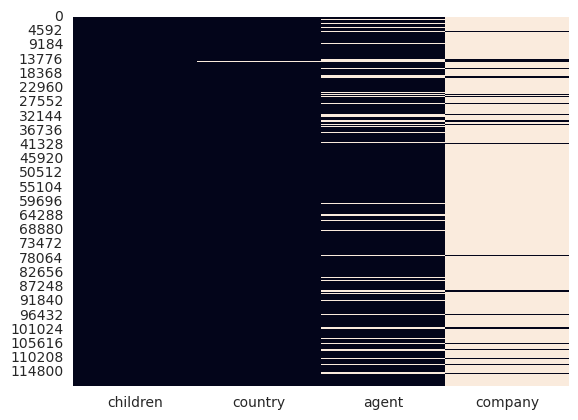

In [6]:
#visualising null values
sns.heatmap(hotels_df[["children", "country", "agent", "company"]].isnull(), cbar=False)
plt.show()

In [7]:
class months_days:
    
    def months():
        return ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    
    def days():
        return ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    
    def months_reordered():
        
        month_order= [months_days.months()[-1]]
        month_order.extend(months_days.months()[:-1])
        return month_order


In [8]:
 def tweak_hotels_df(hotels_df):
        
    """
    cleans and applies optimal datatypes to the dataframe to optimize memory usage
    """
    
    
    #creating a dict containing the most optimal datatypes pertaining to each column
    col_type_dict= {"lead_time": "int32", "arrival_date_month": "category", "stays_in_weekend_nights": "int8", 
                    "stays_in_week_nights": "int8", "adults": "int8", "babies": "int8", "meal": "category",
                    "market_segment": "category", "distribution_channel": "category", "is_repeated_guest": "category", 
                    "previous_cancellations": "int8", "previous_bookings_not_canceled": "int8",
                    "reserved_room_type": "category", "assigned_room_type": "category", "booking_changes": "int8", 
                    "deposit_type": "category", "days_in_waiting_list": "int32", "customer_type": "category",
                    "required_car_parking_spaces": "int8", "total_of_special_requests": "int8", "reservation_status": "category", 
                    "reservation_status_date": "datetime64[ns]"}
    
    #creating a dict containing new and old names of columns
    old_new_cols_dict= {"arrival_date_year": "year", "arrival_date_month": "month", "arrival_date_day_of_month": "day"}
    #creating a dict containing the month names and the corresponding month number
    month_dict= {month: index+1 for index, month in 
                 enumerate(months_days.months())}
    
    #creating a list of names of columns that need to be dropped
    cols_to_drop= ["is_canceled", "month", "year", "day", "arrival_date_week_number", "reservation_status", "email", "phone-number", "credit_card"]
    
    return (hotels_df
            .loc[hotels_df["is_canceled"]==0] #removing bookings that were cancelled
            .astype(col_type_dict) #assigning optimal dtypes            
            .rename(columns= old_new_cols_dict) #changing the names of cols with date attributes
            .assign(
                    #dealing with null values in children, agent, company and country columns
                    children= hotels_df["children"].fillna(round(hotels_df["children"].mean(), 0)).astype("int8"),
                    agent= hotels_df["agent"].fillna(0).astype("int32").astype("category"),
                    company= hotels_df["company"].fillna(0).astype("int32").astype("category"),
                    country= hotels_df["country"].fillna(hotels_df["country"].mode()[0]).astype("category"),
                    #adding arrival_date column
                    month= lambda df_: df_["month"].map(month_dict),
                    arrival_date= lambda df_: pd.to_datetime(df_[["year", "month","day"]])
                   )
#             .astype({"arrival_date":"datetime64[ns]"})
            .drop(columns= cols_to_drop) #dropping unnecessary columns
            .reset_index(drop= True)
           )


In [9]:
#tweaked dataframe
hotels= tweak_hotels_df(hotels_df)
hotels.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,arrival_date
0,Resort Hotel,342,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,2015-07-01,Ernest Barnes,2015-07-01
1,Resort Hotel,737,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,2015-07-01,Andrea Baker,2015-07-01
2,Resort Hotel,7,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,2015-07-02,Rebecca Parker,2015-07-01
3,Resort Hotel,13,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,2015-07-02,Laura Murray,2015-07-01
4,Resort Hotel,14,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,2015-07-03,Linda Hines,2015-07-01


In [10]:
def get_total_row(df_):
    return df_.append({"index": "Total", 
                      "original": df_["original"].sum(),
                      "tweaked": df_["tweaked"].sum()}, ignore_index= True)

In [11]:
#to check the reduction in memory size of the dataframe
memory_usage_original= pd.Series(hotels_df.memory_usage(deep= True), name= "original")#.sum()
memory_usage_tweaked=  pd.Series(hotels.memory_usage(deep= True), name= "tweaked")#.sum()

x= (pd
    .merge(memory_usage_original, memory_usage_tweaked, left_index= True, right_index= True, how= "outer")
    .reset_index()
    .pipe(get_total_row)
    .assign(percentage_reduced= lambda df_: round((df_["original"]- df_["tweaked"])/df_["original"]*100, 2))
    .set_index("index")
   )
# x.loc["Total"] = x.sum()

# x["check"]= np.where(x["original"]> x["tweaked"], True, False)   #np.select, np.where
# x["reduced_by"]= round((x["original"]- x["tweaked"])/x["original"]*100, 2)


print(f"%age reduction in memory usage: {x.loc['Total', 'percentage_reduced']}")
print("other comparisons")
x

%age reduction in memory usage: 89.89
other comparisons


,original,tweaked,percentage_reduced
index,,,
Index,128.0,128.0,0.00
adr,955120.0,601328.0,37.04
adults,955120.0,75166.0,92.13
agent,955120.0,161300.0,83.11
arrival_date,NaN,601328.0,NaN
arrival_date_day_of_month,955120.0,NaN,NaN
arrival_date_month,7510011.0,NaN,NaN
arrival_date_week_number,955120.0,NaN,NaN
arrival_date_year,955120.0,NaN,NaN


# Functions that might come handy later

# Descriptive Statistics

In [12]:
#numerical variables
hotels.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000
mean,79.984687,0.928971,2.464053,1.829737,0.102347,0.010377,0.015792,0.202977,0.293364,1.589868,99.987693,0.099300,0.714060
std,91.109888,0.993371,1.924803,0.510451,0.390836,0.113007,0.272421,1.810713,0.736266,14.784875,49.206263,0.303176,0.833887
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,9.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000,0.000000,0.000000
50%,45.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.500000,0.000000,1.000000
75%,124.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000,1.000000
max,737.000000,19.000000,50.000000,4.000000,3.000000,10.000000,13.000000,72.000000,21.000000,379.000000,510.000000,8.000000,5.000000


In [13]:
#categorical variables
hotels.describe(include= "category")

,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type
count,75166,75166,75166,75166,75166,75166,75166,75166,75166,75166,75166
unique,5,165,7,5,2,9,10,3,315,332,4
top,BB,PRT,Online TA,TA/TO,0,A,A,No Deposit,9,0,Transient
freq,57800,21492,35738,57718,71908,52364,41105,74947,18697,69560,53099


# Assumptions and List of Visualizations to be made

Assumptions-

1.80% of the business came from 20% of agents/companies (Pareto Principle)
    
   ~~1.1.find the top 10 agents~~
   
   1.2.find the top 10 companies (based on total spending by the guests)

2.Bookings are more on weekends compared to weekdays

3.City hotels are more prone to canclellations compared to resort hotels

4.Corporate clients are more prone to cancel their stays

5.Resort Hotels see higher business during holiday seasons, whereas for City Hotels, the clientele is pretty much same thru out the year

6.Most Profiatble Guests(as per ADR * total no.of nights spent)

~~7.Most preferred meal plan~~

8.Relation b/w meal plan and ADR

~~9.In which month do both of the hotels have the least/highest occupancy~~

~~10.Count of guests based on countries(Map Visualization)~~

~~11.Bookings by Market Segment(Pie Chart)~~



Visualizations-

~~1.Calendar based Heat Map (Busiest Month)~~

2.Calendar based Heat Map to check when their are least transient/transient-party guests
Incentivize contract bookings at this time of the year

~~3.Waffle Chart~~

4.Nightingale Rose Chart(Busiest Months)

~~5.Top 10 countries (Map Visualization)~~


Dealing with Outliers-

   Use Quantile based flooring and capping
   ~~Mean/Median imputation~~

https://www.xotels.com/en/glossary/displacement-analysis

use displacement analysis to check which is more profitable for the two groups of hotels(resort/city). take into account the month/season.

# Visualizations

In [14]:
#some bookings have 0 guests(0 adults, 0 children, 0 babies) but amount spent is non zero, also reservation status in majority of them is Check-Out(155), followed by Cancelled(24) and No-Show(1)
# len(hotels.loc[hotels["total_guests"]==0])

In [15]:
#the is_canceled column shows that there were over 44k cancellations where as the reservation_status shows only 43k cancellations
# print(len(hotels.loc[hotels["is_canceled"]==1]))
# print(len(hotels.loc[hotels["reservation_status"]== "Canceled"]))

In [16]:
# hotels.loc[hotels["is_canceled"]==1]["reservation_status"].value_counts()

In [17]:
def remove_small_segments_func(df_, col, val= 1):
    total_size= df_[col].sum()
    return df_.drop(df_[df_[col]/total_size*100<= val].index)

In [18]:
def proportion_func(df_):
    total_bookings= df_.loc[:, "size"].sum()
    return (df_
            .assign(proportion= round((df_["size"]/total_bookings)*100, 0).astype("int8"))
           )

In [19]:
def get_df(df, name):
    globals()[name]= df
    return df

In [20]:
#find the top 10 agents

top_10_agents= (hotels
            .loc[hotels["agent"]!= 0]
            .groupby("agent",as_index= False, observed= True)
            .size()
            .sort_values("size", ascending= False, ignore_index= True)
#             .reset_index(drop= True)
#             .pipe(df_name, "df")
#             .assign(cumperc= df.apply(lambda row: row["size"].cumsum()/df["size"].sum()*100, axis= 1))
#             .drop(df[df["size"]== 0].index)            
            .iloc[:10]
#             .pipe(remove_unused_categories, "agent")
#             .pipe(df_name, df)
            .assign(agent= lambda df_: df_["agent"].cat.remove_unused_categories())
#             .set_index("agent")
#             .astype({"agent": "str"})
           )
top_10_agents

,agent,size
0,9,18697
1,240,8438
2,7,3065
3,14,2988
4,250,2357
5,6,2265
6,1,1911
7,28,1556
8,241,1485
9,8,1087


In [21]:
#altair code
(alt.Chart(top_10_agents,
       title= alt.TitleParams(
           "Top 10 Agents",
           subtitle= "insights- xyzpqr")
       )
 .mark_bar()
 .encode(
     alt.X("agent:N", sort= "-y"),
     alt.Y("size:Q")
 )
 .properties(
     width= 500,
     height= 600
 )
 .configure_title(
     align= "left",
     anchor= "start",
     fontSize= 30,
     font= "Din"
 )
#  .configure_bar(
#      color= "#BA94D1"
#  )
#  .interactive()
)



alt.Chart(...)

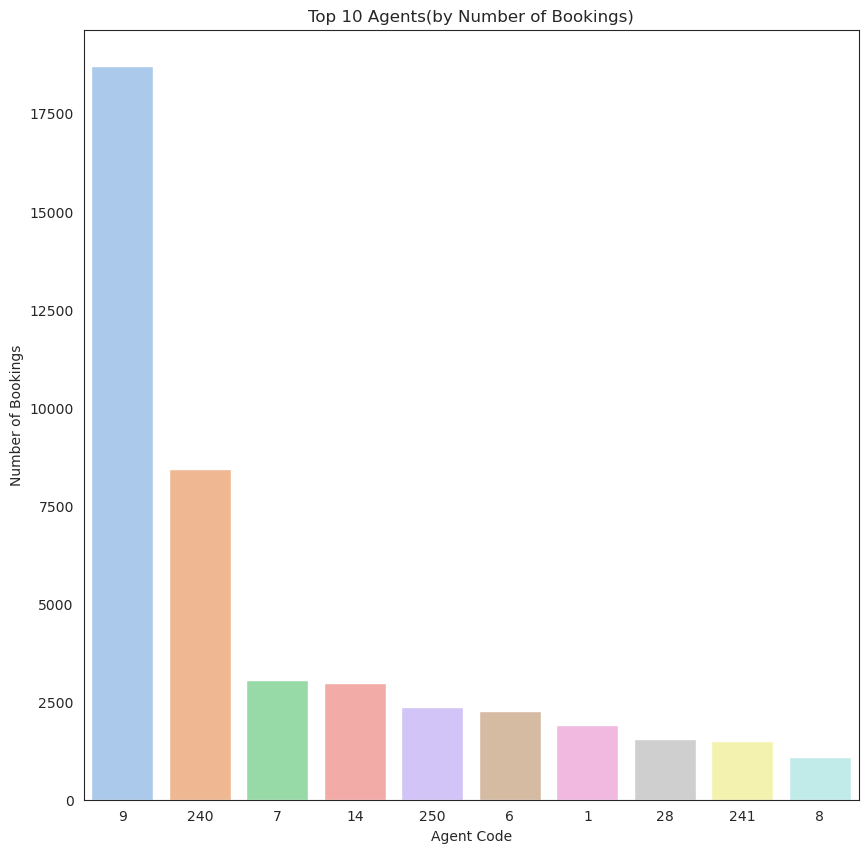

In [22]:
#creating a bar plot to show the top 10 agents based on number of bookings made 
fig= plt.figure(figsize= (10, 10))

sbar= sns.barplot(data= top_10_agents, x= "agent", y= "size", order= top_10_agents["agent"])

plt.title("Top 10 Agents(by Number of Bookings)")
plt.xlabel("Agent Code")
plt.ylabel("Number of Bookings")
plt.show()

# agents_df
# .loc[agents_df["size"]==0]

In [23]:
def pareto_df(df, threshold= 80):
    """
    creates a df with proportion column containing all the individual elements <= the threshold value,
    and ends with the sum of the remaining
    """
    
    total_size= df["size"].sum()
    
    def customize_df(df_, threshold):
        
        df_bottom= df_.loc[df_["cumperc"]> threshold]
    
        return (df_
                .loc[df_["cumperc"]<= threshold]
                .append(pd.Series(
                            [f"Remaining {len(df_bottom)}",
                             df_bottom["size"].sum(),
                             100], index= df_.columns),
                        ignore_index= True)
        )
    
    #returning dataframe containing entries with cumperc less than the threshold value and the remaining as one single entry
    return (
        df
        .sort_values("size", ascending= False)
        .assign(cumperc= lambda row: round(row["size"].cumsum()/total_size*100, 2))
        .reset_index(drop= True)
        .pipe(customize_df, threshold)
    )

In [24]:
#creating a dataframe with cumperc column for the pareto chart

agents= (
    hotels
    .loc[hotels["agent"]!= 0]#.copy()
    .groupby("agent",as_index= False, observed= True)
    .size()
    .sort_values("size", ascending= False)
    .reset_index(drop= True)
#             .pipe(df_name, "df")
#             .assign(cumperc= df.apply(lambda row: row["size"].cumsum()/df["size"].sum()*100, axis= 1))
#             .drop(df[df["size"]== 0].index)            
    .pipe(pareto_df, threshold= 80)
#             .pipe(df_name, df)
#             .assign(agent= df.agent.cat.remove_unused_categories())
#     .astype({"agent": "category"})
#     .set_index("agent")
)
agents

,agent,size,cumperc
0,9,18697,29.75
1,240,8438,43.17
2,7,3065,48.05
3,14,2988,52.80
4,250,2357,56.55
5,6,2265,60.15
6,1,1911,63.19
7,28,1556,65.67
8,241,1485,68.03
9,8,1087,69.76


In [25]:
# agents.memory_usage(deep= True).sum()   
# #category= 1937
# #object= 1358

In [26]:
#creating a base chart
base= (alt.Chart(agents,
       title= alt.TitleParams(
           "Agents (Pareto Chart)",
           subtitle= "insights- xyzpqr",)
       )
       .encode(
           alt.X(
               "agent:N",
               sort= alt.EncodingSortField("cumperc", order= "ascending"), 
               axis=alt.Axis(title="Agent Code"),
           ),   
       )
       .properties(
           width= 1200,
           height= 600,
       )
      )

#creating bar chart on top of base chart
bar= (base.mark_bar()
      .encode(
          alt.Y(
              "size:Q",
              axis= alt.Axis(title= "Number of Bookings"),)
      )
     )

#creating line chart on top of base chart
line= (base.mark_line(color= "#fc4f30",)
       .encode(
           alt.Y(
               "cumperc:Q",
               axis= alt.Axis(title= "Cumulative Percentage"),)
       )
#        .configure_line(
#            color= "#fc4f30",
#            point= True,
#        )
)
      

(alt.layer(bar, line)
 .resolve_scale(y= "independent")
#  .resolve_legend()
#  .configure_title(
#      align= "left",
#      anchor= "start",
#      fontSize= 30,
#      font= "Din",
#  ) 
 .configure_axisX(
     labelAngle= 0
 )
 .configure_line(
#      color= "#4682b4",
     point= True,
 )
 .configure_bar(
#      align= "center",
     tooltip= {"content": "data"}
     
 )
)

alt.LayerChart(...)

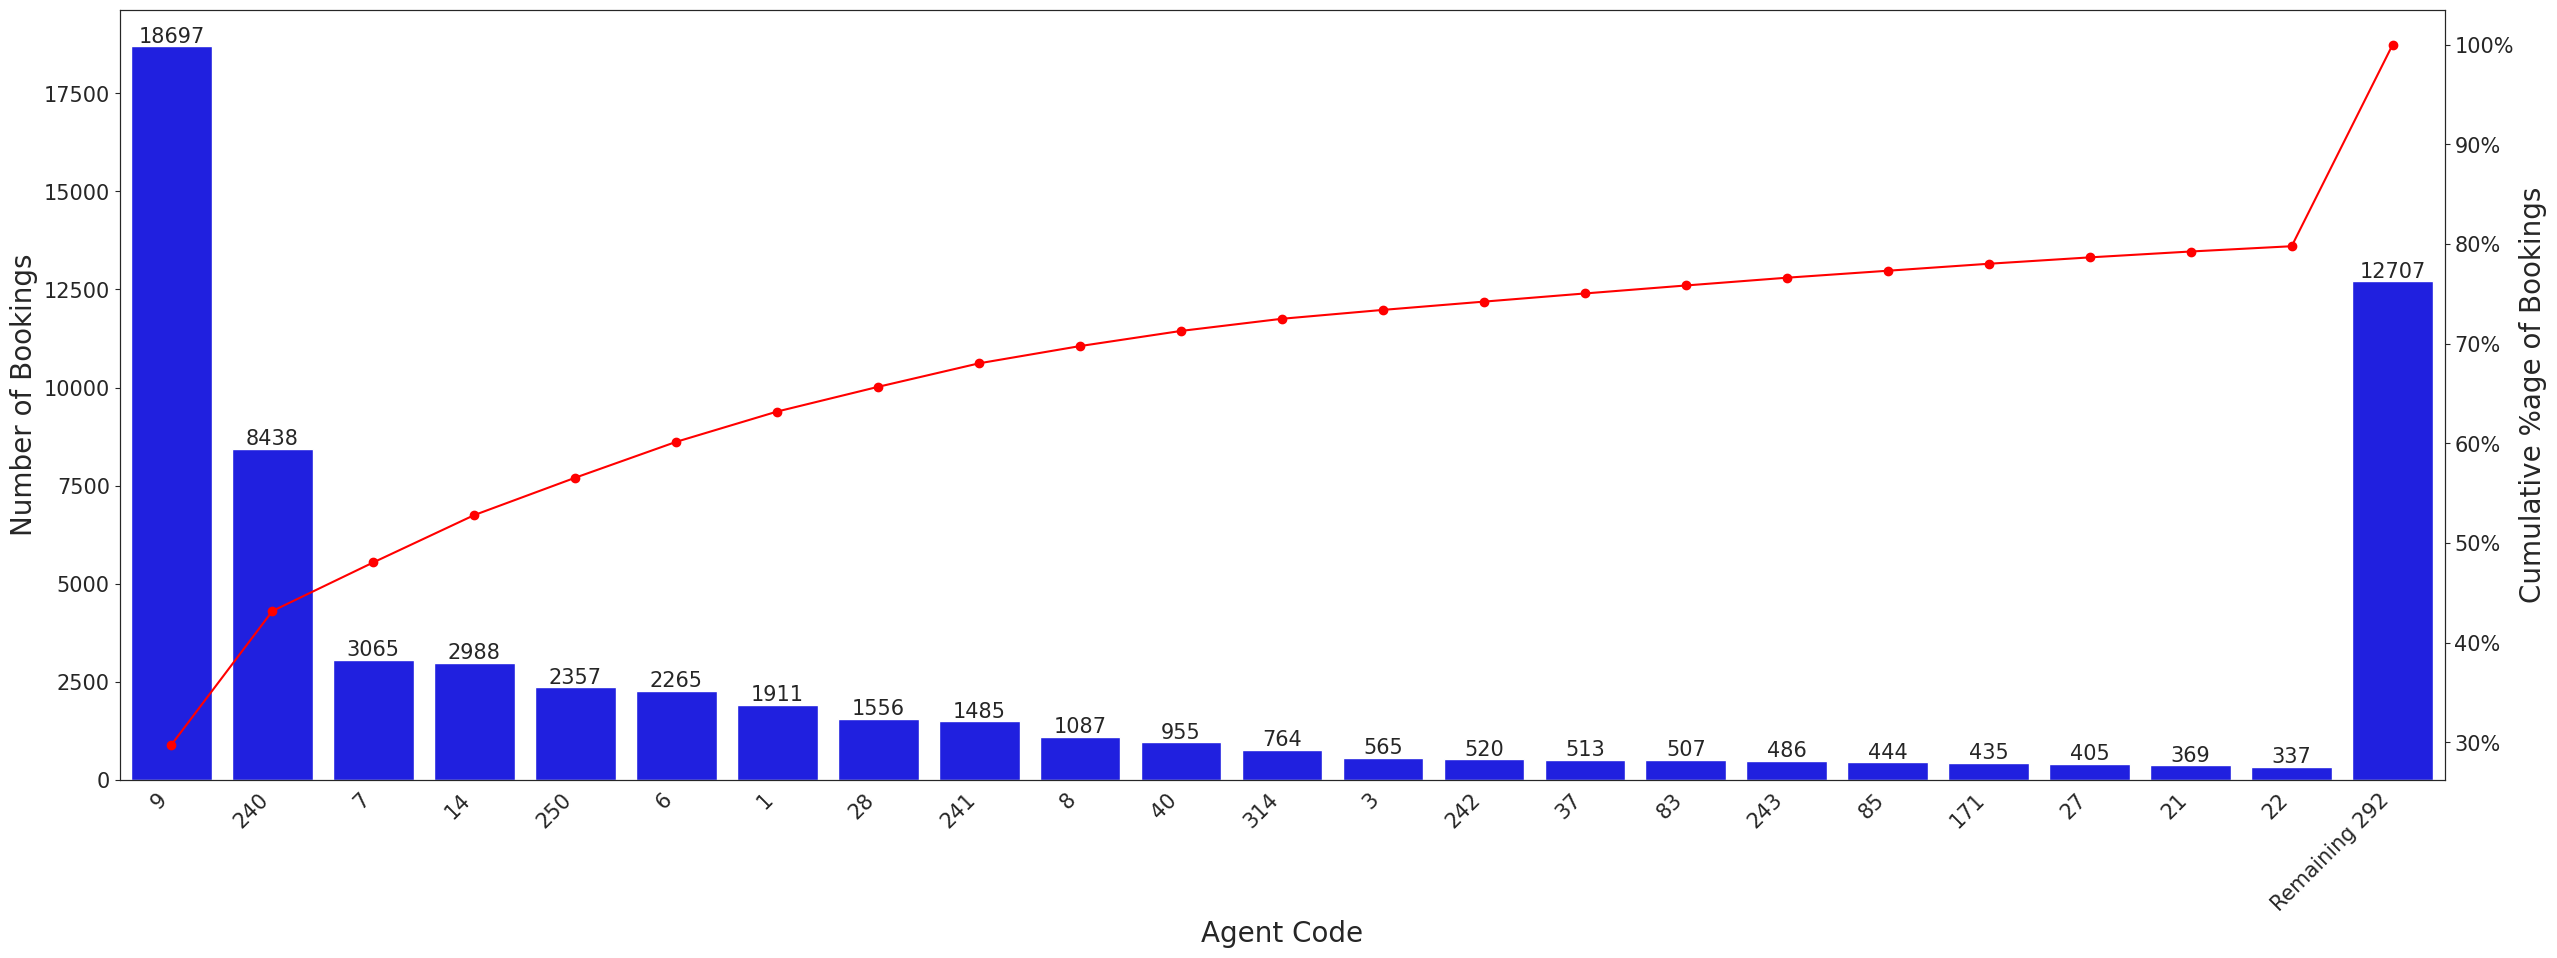

In [27]:
#pareto chart
fig, ax= plt.subplots(figsize= (30, 10), sharex= True)

#plotting the count of bookings of agents as a bar plot
sbar= sns.barplot(data= agents, x= "agent", y=  "size", color= "blue", ax= ax)

#customising the bar plot by adding bar labels, rotating and enlarging the xticks
plt.bar_label(sbar.containers[0], fontsize= 15)
plt.xticks(rotation= 45, fontsize= 15, horizontalalignment= "right")
plt.xlabel("Agent Code", fontsize= 20)

#customising the primary y axis
plt.yticks(fontsize= 15)
ax.set_ylabel("Number of Bookings", fontsize= 20)

#aligning the first and last bars near to the edges
ax.set_xmargin(0.005)


#plotting the cumulative percentage of bookings for agents as a line plot
ax2= ax.twinx()
ax2.plot(agents["cumperc"], color="red", marker="o")

#customising the secondary y axis
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.tick_params(labelsize= 15)
ax2.set_ylabel("Cumulative %age of Bookings", fontsize= 20)



#adding a grey area encapsulating the agents that constitute 80% of the sales
# threshold = 80
# agents_df_pareto["bar_cumperc"] = agents_df_pareto['cumperc'] - agents_df_pareto['cumperc'][0] + agents_df_pareto['size'][0]
# idx80 = (agents_df_pareto['cumperc'] >= threshold).idxmax()

# ax2.fill_between(agents_df_pareto['agent'][:idx80+1], 0, agents_df_pareto['cumperc'][:idx80+1],
#                  facecolor='grey', alpha=0.3)

plt.show()


####work on the aesthetics of the chart

In [28]:
# #creating a pareto chart


# #creating a bar plot
# fig, ax = plt.subplots(figsize= (30, 10))
# sns.barplot(data= agents, x= "agent", y= "size",order= agents["agent"], ax= ax)

# #creating a line plot on top of the bar plot
# ax2 = ax.twinx()
# plt.plot(agents["cumperc"], color="red", marker="o")
# ax2.yaxis.set_major_formatter(PercentFormatter())

# #specify axis colors
# ax.tick_params(axis='y', colors="blue")
# ax2.tick_params(axis='y', colors="red")


# # ax.set_xticks(horizontalalignment='left', x=1.0, rotation= 90)

# plt.show()

In [29]:
#another option
#paretochart library- https://pypi.org/project/paretochart/

In [30]:
#find the top 10 companies

companies= (
    hotels
    .loc[hotels["company"]!= 0]#.copy()
    .groupby("company", as_index= False, observed= True)
    .size()
    .sort_values("size", ascending= False, ignore_index= True)
#     .agg(total_revenue_generated= ("adr", np.sum), 
#          avg_revenue_generated= ("adr", np.mean), 
#          size= ("hotel", np.count))
#     .dropna()
    .iloc[:10]
    .assign(company= lambda df_: df_["company"].cat.remove_unused_categories())
)

companies

,company,size
0,40,850
1,223,665
2,45,222
3,153,167
4,219,132
5,154,128
6,174,128
7,281,121
8,233,103
9,405,101


In [31]:
#altair code
(alt.Chart(companies,
       title= alt.TitleParams(
           "Top 10 Companies",
           subtitle= "insights- xyzpqr")
       )
 .mark_bar()
 .encode(
     alt.X("company:N", sort= "-y"),
     alt.Y("size:Q")
 )
 .properties(
     width= 500,
     height= 600
 )
 .configure_title(
     align= "left",
     anchor= "start",
     fontSize= 30,
     font= "Din"
 )
 .configure_bar(
     color= "#BA94D1"
 )
#  .interactive()
)

alt.Chart(...)

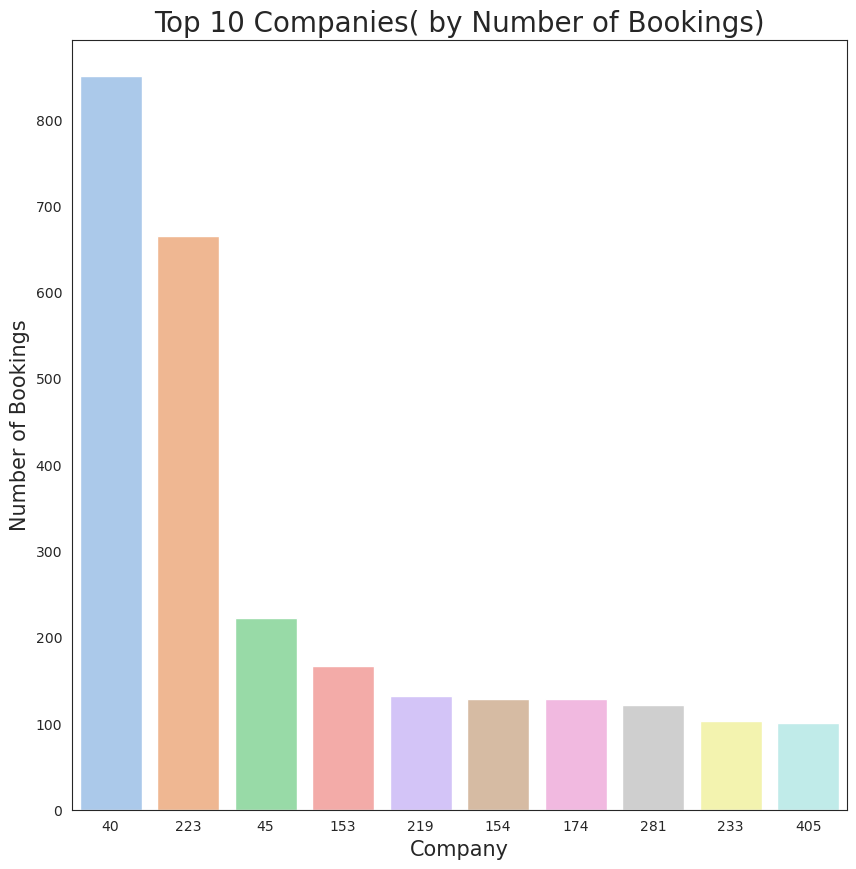

In [32]:
# color_palette= sns.color_palette("viridis_r")

fig= plt.figure(figsize= (10, 10))
sns.barplot(data= companies, x= "company", y= "size", order= companies["company"])

#aesthetics
plt.xlabel("Company", fontsize= 15)
plt.ylabel("Number of Bookings", fontsize= 15)
plt.title("Top 10 Companies( by Number of Bookings)", fontsize= 20)
plt.show()

In [33]:
# agents_df= hotels.loc[hotels["agent"]!= "0"].groupby("agent", as_index= False).size()
# agents_df.agent= agents_df.agent.cat.remove_unused_categories()
# agents_df_pareto= pareto_df(agents_df, 85)


# # agents_df_final= agents_df_pareto.loc[agents_df_pareto["size"]>300].reset_index(drop= True)

# # #appending the contribution of remaining agents
# # agents_df_bottom= agents_df_pareto.loc[agents_df_pareto["size"]<=300]

# # agents_df_final= agents_df_final.append({
# #     "agent": f"Remaining {len(agents_df_bottom)} agents",
# #     "size": agents_df_bottom["size"].sum(), 
# #     "cumperc": 100
# # }, ignore_index= True)

# agents_df_pareto

In [34]:
# contract bookings by companies
companies_with_contract= (
    hotels
    .loc[(hotels["company"]!= 0) & (hotels["customer_type"]== "Contract")].copy()
    .assign(company= lambda df_: df_["company"].cat.remove_unused_categories)
    .loc[:, "company"]
    .unique()
)
companies_with_contract
# companies_df.loc[companies_df["customer_type"]== "Contract"]["company"].unique()
# companies_df["company"].unique()


########insight- only 2 companies(40, 9) have contract based bookings

array([<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.arrays.categorical.CategoricalAccessor object at 0x7829e11eb9d0>>],
      dtype=object)

In [35]:
#Bookings by Market Segment(Pie Chart)
market_seg= (hotels
             .groupby("market_segment", as_index= False)
             .size()
             .pipe(remove_small_segments_func, "size")
             .reset_index(drop= True)
            )
market_seg
#removing market segments with low market share for aesthetic reasons
# total_market_size= sum(market_seg_df["size"])
# market_seg_df= market_seg_df.drop(market_seg_df[market_seg_df["size"]/total_market_size*100<=1].index)

# market_seg_df= market_seg_df.reindex([0, 2, 1, 3, 7, 4, 5, 6])

,market_segment,size
0,Corporate,4303
1,Direct,10672
2,Groups,7714
3,Offline TA/TO,15908
4,Online TA,35738


In [36]:
(alt.Chart(market_seg,
           title= alt.TitleParams(
               "Distribution of Market Segment based on Number of Bookings",
               subtitle= "insights- xyzpqrxyzpqrxyzpqr",
           )
          )
 .mark_arc()
 .encode(
     alt.Theta("size:Q"),
     alt.Color("market_segment:N"),
 )
 .properties(
     width= 300,
     height= 300,
 )
 .configure_title(
     align= "left",
     anchor= "start"
 )
)

alt.Chart(...)

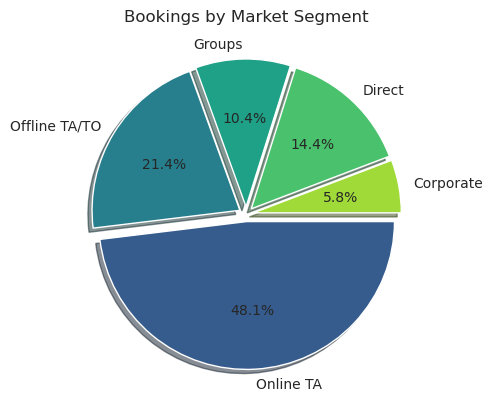

In [37]:
#pie chart
color_palette= sns.color_palette("viridis_r")

fig= plt.figure()
explode= [0.05]*len(market_seg)
plt.pie(x= market_seg["size"], labels= market_seg["market_segment"], autopct= '%1.1f%%', explode= explode, colors= color_palette, shadow= True)
plt.title("Bookings by Market Segment")
# plt.legend(title= "Market Segment")
# plt.tight_layout()
plt.show()

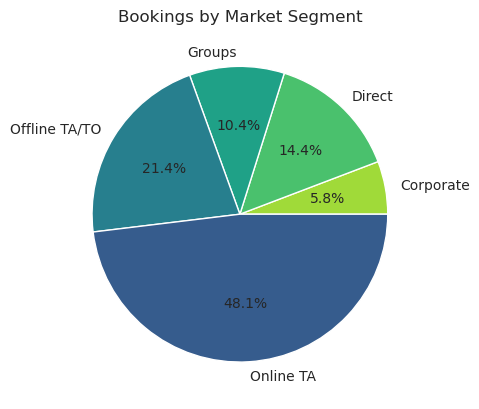

In [38]:
#pie chart(alternate)

fig= plt.figure()
explode= [0.05]*len(market_seg)
plt.pie(x= market_seg["size"], labels= market_seg["market_segment"], autopct= '%1.1f%%', wedgeprops= {"linewidth": 1, "edgecolor": "white"}, colors= color_palette)
plt.title("Bookings by Market Segment")
# plt.legend(title= "Market Segment")
# plt.tight_layout()
plt.show()

In [39]:
# In which month do both of the hotels have the least/highest occupancy

year_month_df= (hotels
                .groupby([hotels["arrival_date"].dt.year.rename("year"), hotels["arrival_date"].dt.month_name().rename("month")])
                .size()
#                 .pipe(get_df, "df_stacked")
                .unstack()
#                 .fillna(0)
                [months_days.months()]
               )

# year_month_df_unstack= year_month_df.unstack()
year_month_df

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,1517.0,2291.0,3020.0,3225.0,1854.0,1947.0
2016,1691.0,2554.0,3347.0,3367.0,3563.0,3196.0,3073.0,3238.0,3372.0,3689.0,2818.0,2462.0
2017,2431.0,2818.0,3298.0,3198.0,3551.0,3208.0,3329.0,3109.0,NaN,NaN,NaN,NaN


In [40]:
guests_by_month= (hotels
                  .groupby(pd.Grouper(key= "arrival_date", freq= "M"), as_index= False)
                  .size()
                 )
guests_by_month

,arrival_date,size
0,2015-07-31,1517
1,2015-08-31,2291
2,2015-09-30,3020
3,2015-10-31,3225
4,2015-11-30,1854
5,2015-12-31,1947
6,2016-01-31,1691
7,2016-02-29,2554
8,2016-03-31,3347
9,2016-04-30,3367


In [41]:
(alt.Chart(guests_by_month,
           title= alt.TitleParams(
               "Number of Bookings by Month and Year",
               subtitle= "insights- xyzpqrxyzpqr",
           ),
          )
 .mark_rect()
 .encode(
     alt.X("month(arrival_date):O",
           title= "Month",
           axis= alt.Axis(orient= "top"),
          ),
     alt.Y("year(arrival_date):O",
           title= "Year",
          ),
     color= alt.Color("size",
                      scale= alt.Scale(scheme= "viridis"),
                     ),
 )
 .properties(
     width= 1200,
     height= 300,
#      domain= False,
 )
 .configure_title(
#      subtitlePadding= 10
 )
 .configure_axis(
#      disable= True,
     domain= False,
 )
#  .configure_axisX(
#      domain= False
#  ) 
)

alt.Chart(...)

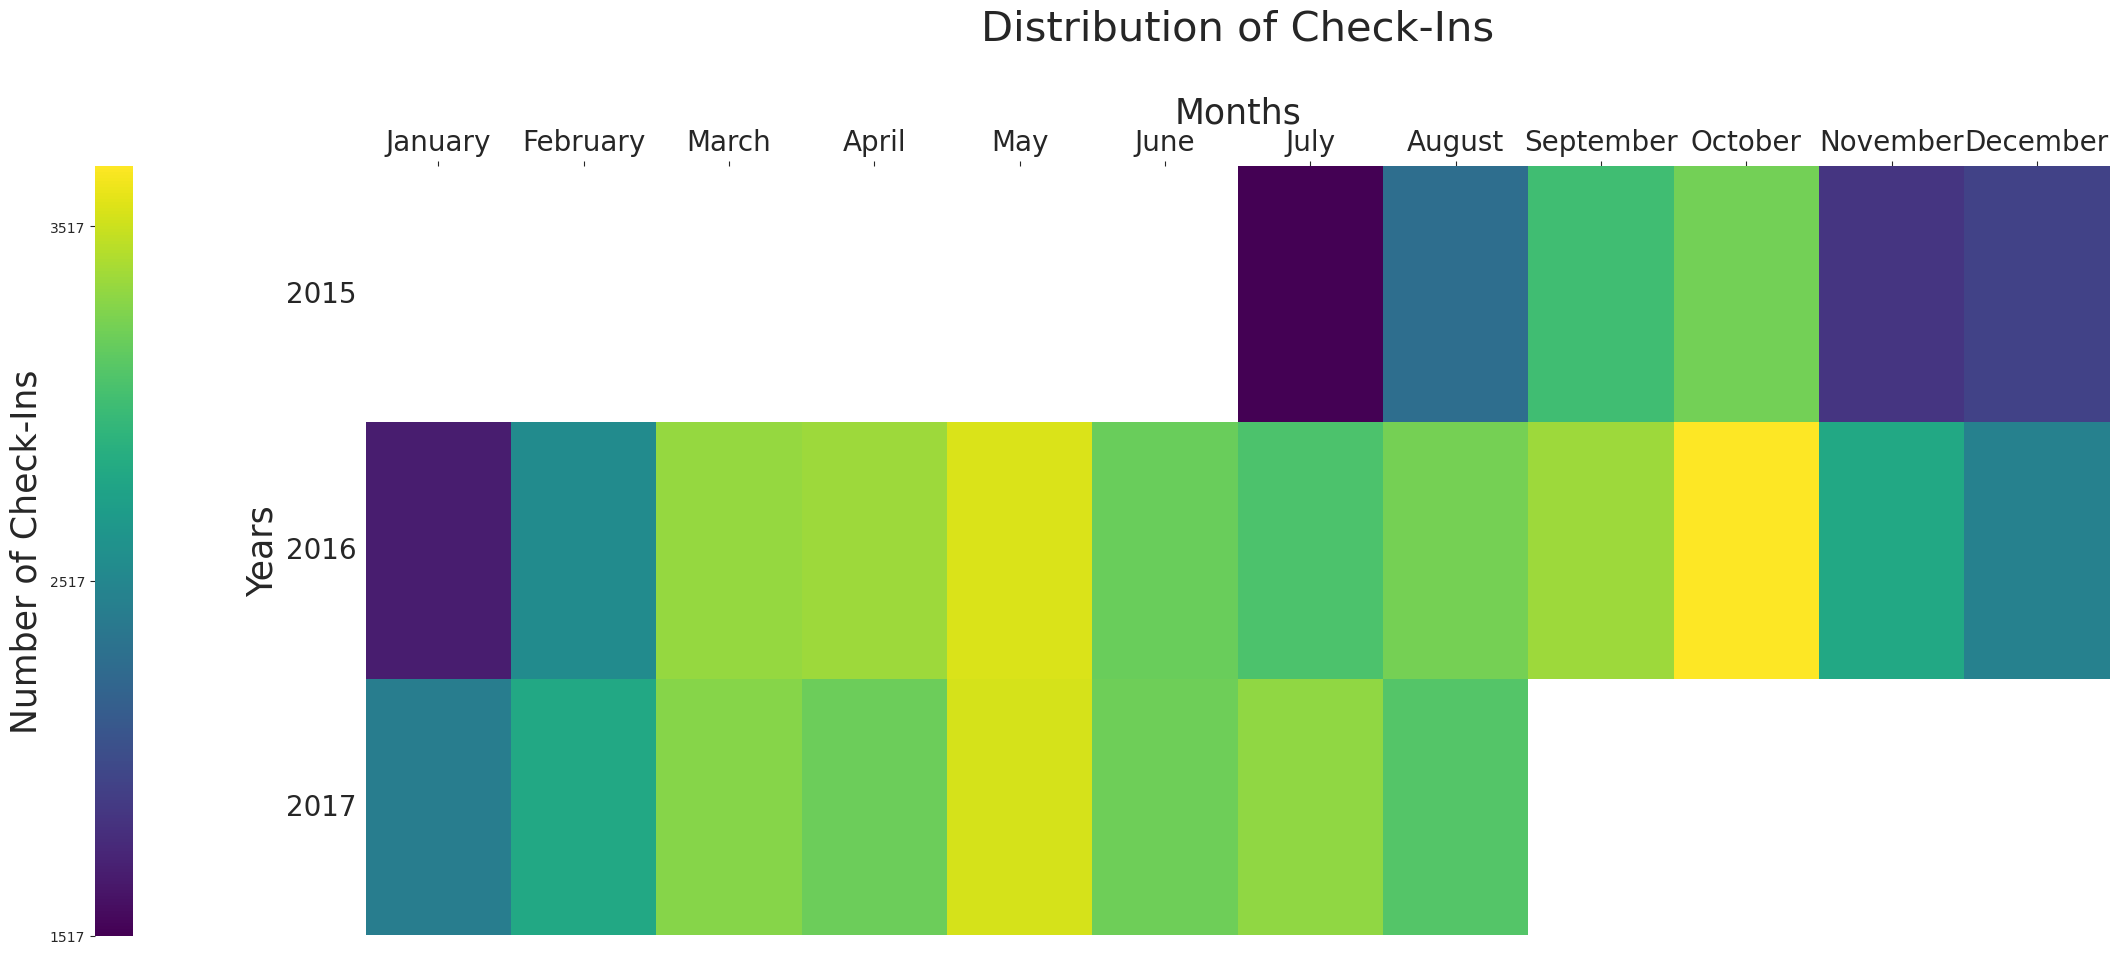

In [42]:
fig= plt.figure(figsize= (30, 10))
ax= sns.heatmap(year_month_df, cmap = "viridis", cbar_kws= {"location": "left"})

ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')

cbar = ax.collections[0].colorbar
cbar.set_ticks(range(int(year_month_df.min().min()), int(year_month_df.max().max()), 1000), fontsize= 20)
cbar.set_label("Number of Check-Ins", fontsize= 25)

plt.xlabel("Months", fontsize= 25)
plt.xticks(fontsize= 20)
plt.ylabel("Years", fontsize= 25)
plt.yticks(rotation=0, fontsize=  20)
plt.title("Distribution of Check-Ins\n", fontsize= 30)
plt.show()

In [43]:
#Most preferred meal plan

#preparing the dataset to be used for the visualization
meal_df= (hotels
          .groupby("meal", as_index= False)
          .size()
          .pipe(proportion_func)
#           .assign(proportion= lambda row: proportion(hotels["size"]))
          .sort_values("proportion", ignore_index= True)
#           .sort_values("proportion", ascending= False)
#           .pipe(remove_small_segments_func, "proportion", 0)
         )
# meal_df["proportion"]= meal_df
# meal_df= meal_df.sort_values("proportion").reset_index(drop= True)
# meal_df= meal_df.sort_values("proportion", ascending= False)
meal_df

,meal,size,proportion
0,FB,320,0
1,Undefined,883,1
2,SC,6684,9
3,HB,9479,13
4,BB,57800,77


In [44]:
for col in hotels.select_dtypes("category"):
    print(col)
    print(hotels[col].nunique())
    print(hotels[col].unique())
    print("_________________________________________________________________________________")

meal
5
['BB', 'FB', 'HB', 'SC', 'Undefined']
Categories (5, object): ['BB', 'FB', 'HB', 'SC', 'Undefined']
_________________________________________________________________________________
country
165
['PRT', 'GBR', 'USA', 'ESP', 'IRL', ..., 'ATF', 'TJK', 'SLE', 'LAO', 'FRO']
Length: 165
Categories (177, object): ['ABW', 'AGO', 'AIA', 'ALB', ..., 'VNM', 'ZAF', 'ZMB', 'ZWE']
_________________________________________________________________________________
market_segment
7
['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Aviation']
Categories (7, object): ['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups', 'Offline TA/TO', 'Online TA']
_________________________________________________________________________________
distribution_channel
5
['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS']
Categories (5, object): ['Corporate', 'Direct', 'GDS', 'TA/TO', 'Undefined']
_______________________________________________________________________________

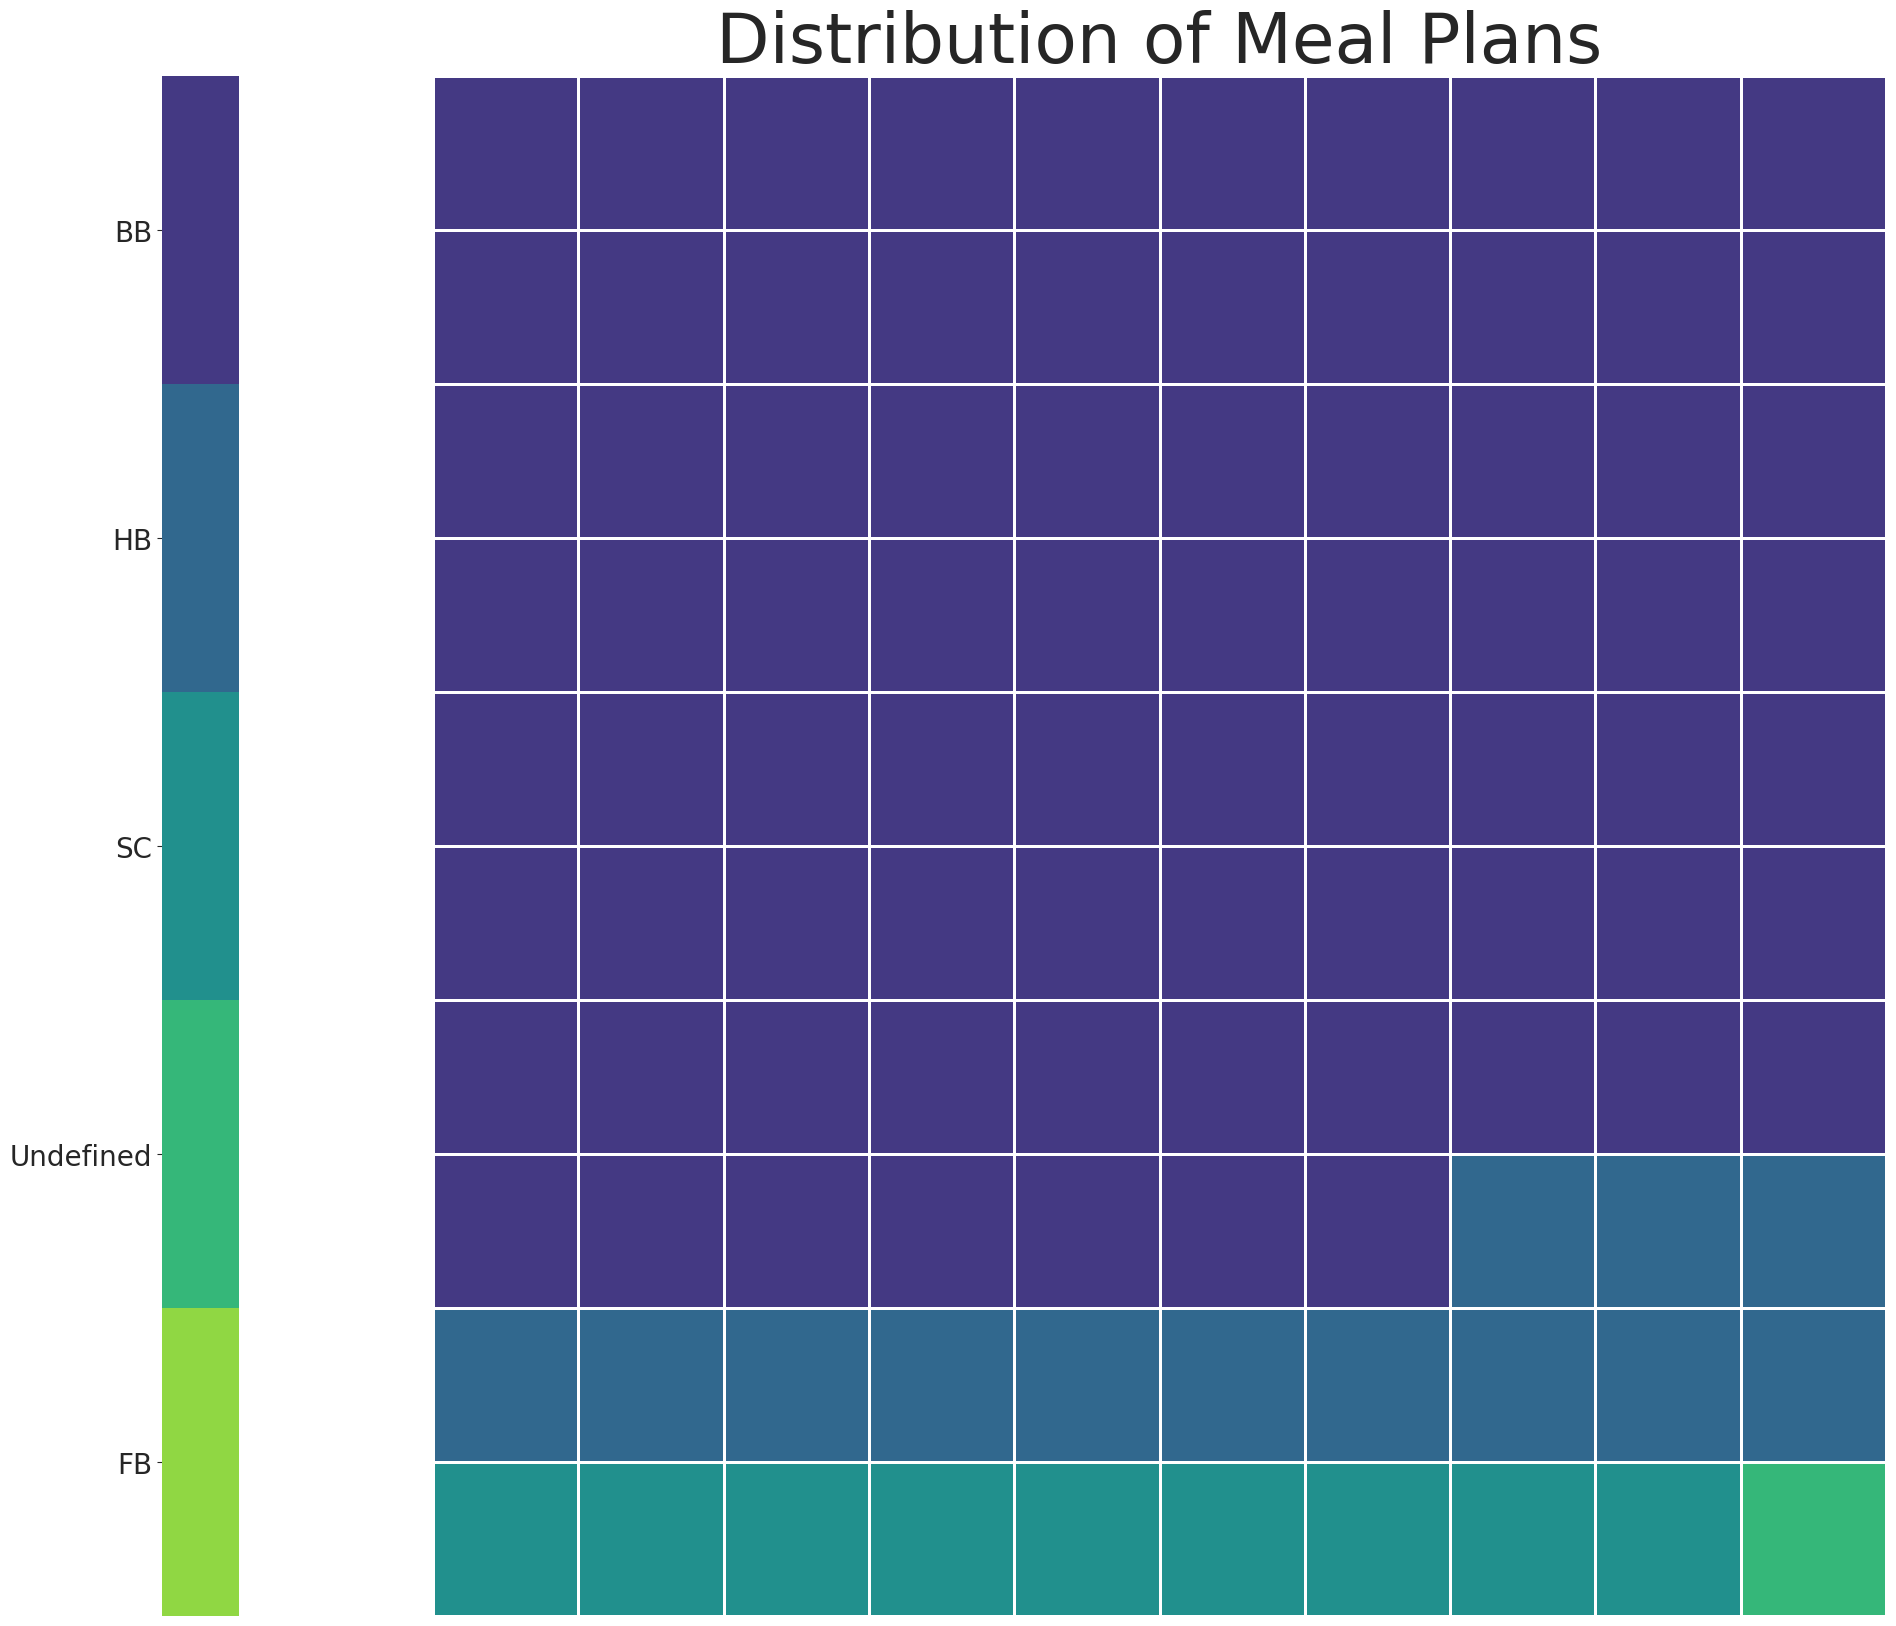

In [45]:
#waffle chart showing the distribution of meal plans opted by customers

x= np.array([])
for i, row in meal_df[::-1].iterrows():
    x= np.append(x, np.repeat(i, row["proportion"]))
x= x.reshape((10,10))

n= len(meal_df)
color_palette = sns.color_palette("viridis_r", n) 


fig= plt.figure(figsize= (25, 20))
ax= sns.heatmap(x, cmap = color_palette, vmin= 0, vmax= 4, linewidths= 0.9, cbar_kws= {"location": "left"})

#designating color codes to meal types
cbar= ax.collections[0].colorbar

r= cbar.vmax - cbar.vmin 
cbar.set_ticks([cbar.vmin + r / n * (0.5 + i) for i in range(n)])
cbar.set_ticklabels(meal_df["meal"], fontsize= 20)

#adding title an removing axis
plt.title("Distribution of Meal Plans", fontsize= 50, pad =10)
plt.axis(False)
plt.show()

In [46]:
#which distribution drives in the most revenue

revenue= (hotels
          [["customer_type", "adr", "stays_in_weekend_nights", "stays_in_week_nights"]]
          .assign(total_nights_spent= lambda df_: df_["stays_in_weekend_nights"]+ df_["stays_in_week_nights"], 
                  total_revenue= lambda df_: df_["total_nights_spent"]* df_["adr"])
          .groupby("customer_type")
          
          .agg(mean_spending= ("total_revenue", np.mean))
          .assign(mean_spending= lambda df_: round(df_["mean_spending"], 2))
#           .assign(mean_spending= round())
)
revenue

,mean_spending
customer_type,
Contract,527.69
Group,238.14
Transient,364.09
Transient-Party,269.83


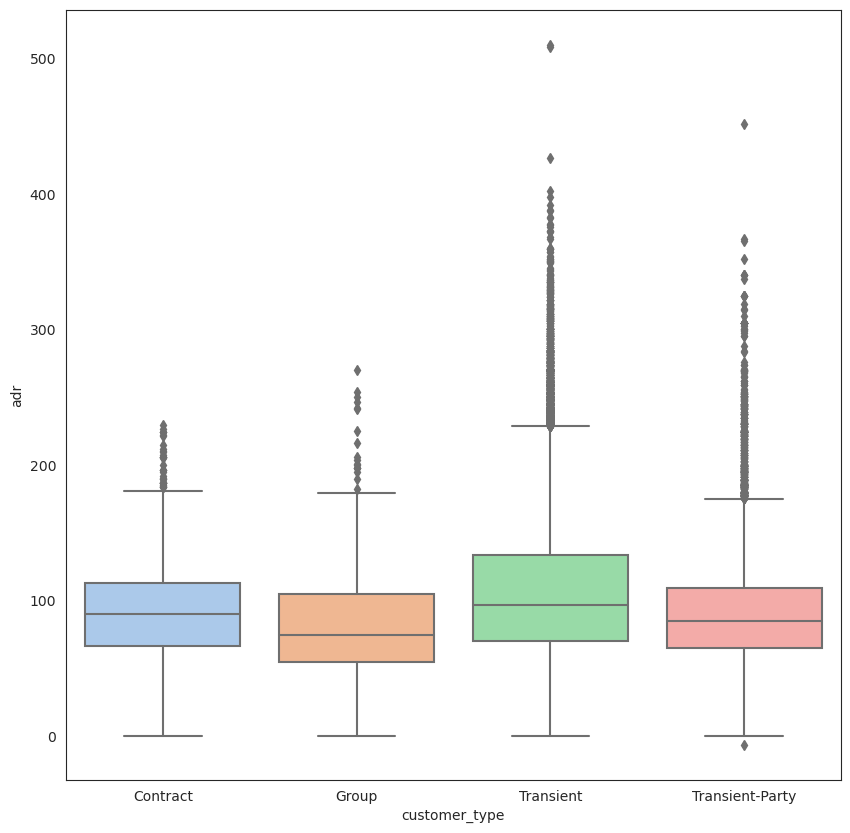

In [47]:
#boxplot

fig= plt.figure(figsize= (10, 10))

sns.boxplot(data= hotels, x= "customer_type", y= "adr")

plt.show()

In [48]:
#on which day do most guests arrive

arrival_day_of_the_week= (
    hotels
    .groupby(hotels["arrival_date"].dt.day_name().rename("day"))
    .size()
    .reindex(months_days.days())
)
arrival_day_of_the_week

day
Monday       11976
Tuesday       9399
Wednesday    10308
Thursday     11327
Friday       11653
Saturday     10926
Sunday        9577
dtype: int64

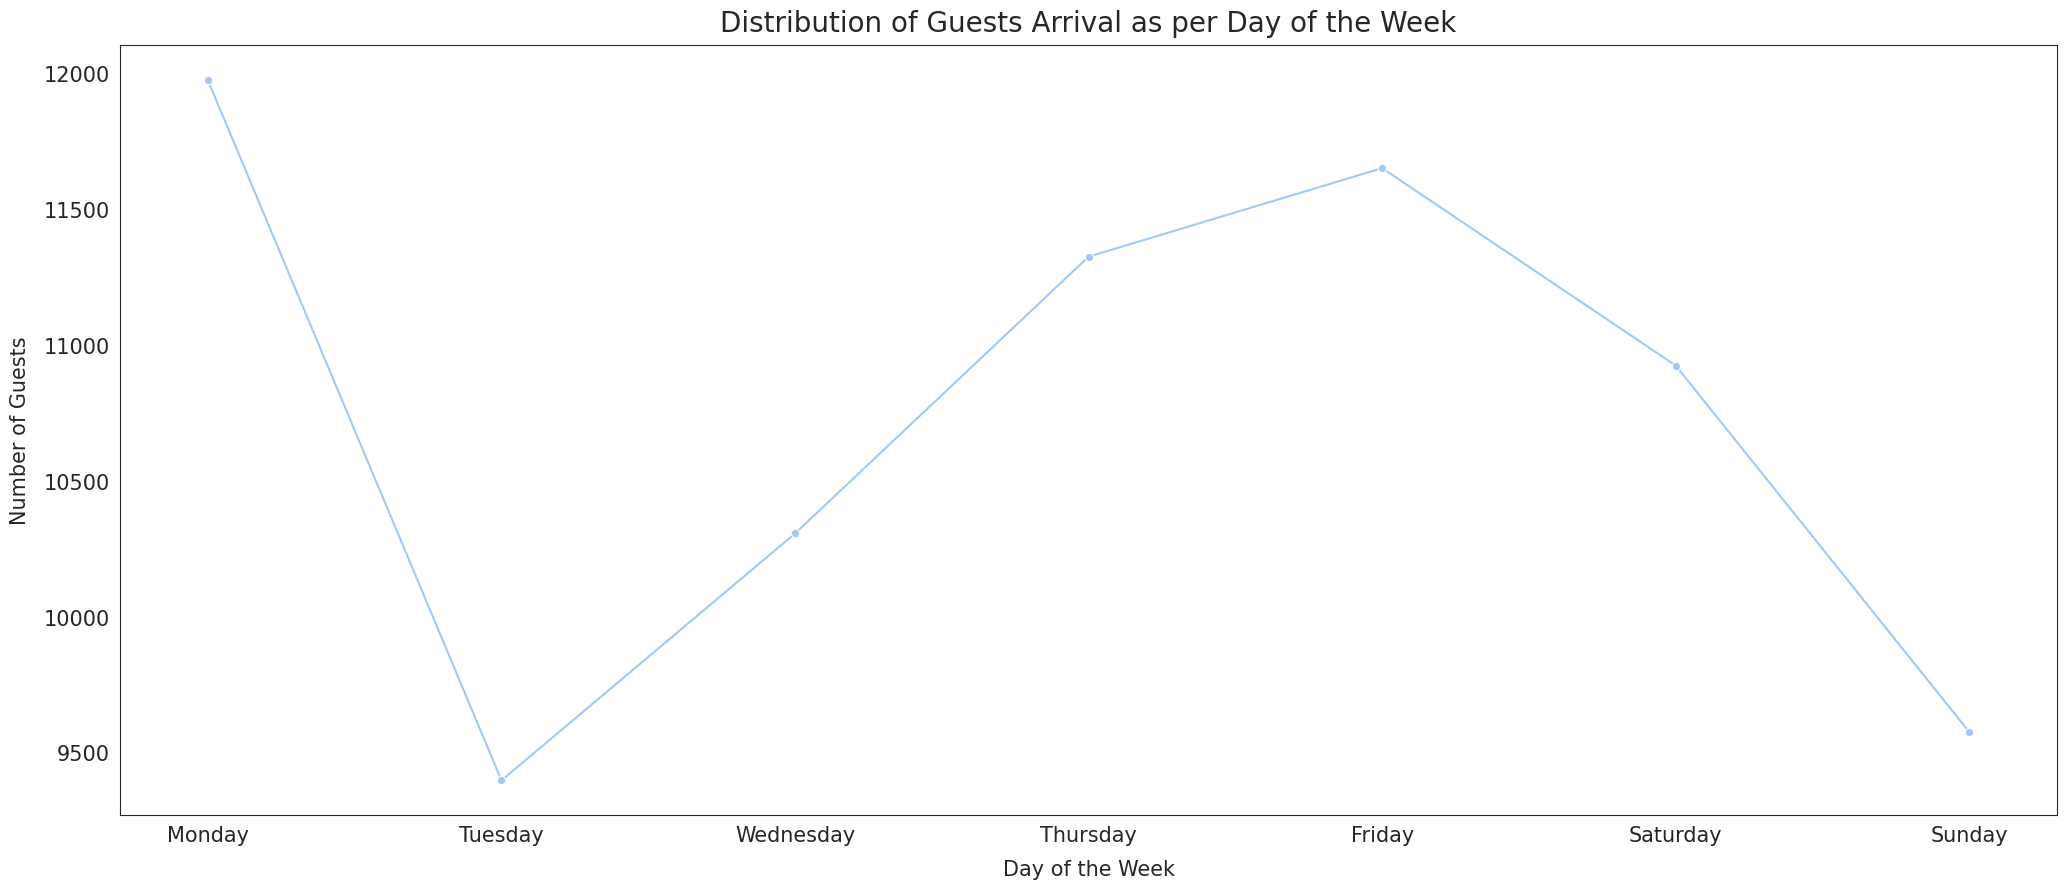

In [49]:
fig= plt.figure(figsize= (25, 10))
sns.lineplot(data= arrival_day_of_the_week, marker= "o")

plt.title("Distribution of Guests Arrival as per Day of the Week", fontsize= 20, pad= 10)
plt.xticks(fontsize= 15)
plt.xlabel("Day of the Week", fontsize= 15, labelpad= 10)

plt.yticks(fontsize= 15)
plt.ylabel("Number of Guests", fontsize= 15, labelpad= 10)
plt.show()

In [50]:
#on which day do most guests arrive(based on customer type)

customer_per_day= (
    hotels
    .groupby([hotels["arrival_date"].dt.day_name().rename("day"), hotels["customer_type"]])  
    .size()
    .unstack()
    .reindex(months_days.days())
)
customer_per_day

customer_type,Contract,Group,Transient,Transient-Party
day,,,,
Monday,435,94,8835,2612
Tuesday,347,69,7140,1843
Wednesday,251,73,6994,2990
Thursday,641,68,7554,3064
Friday,353,61,7702,3537
Saturday,337,57,7611,2921
Sunday,450,96,7263,1768


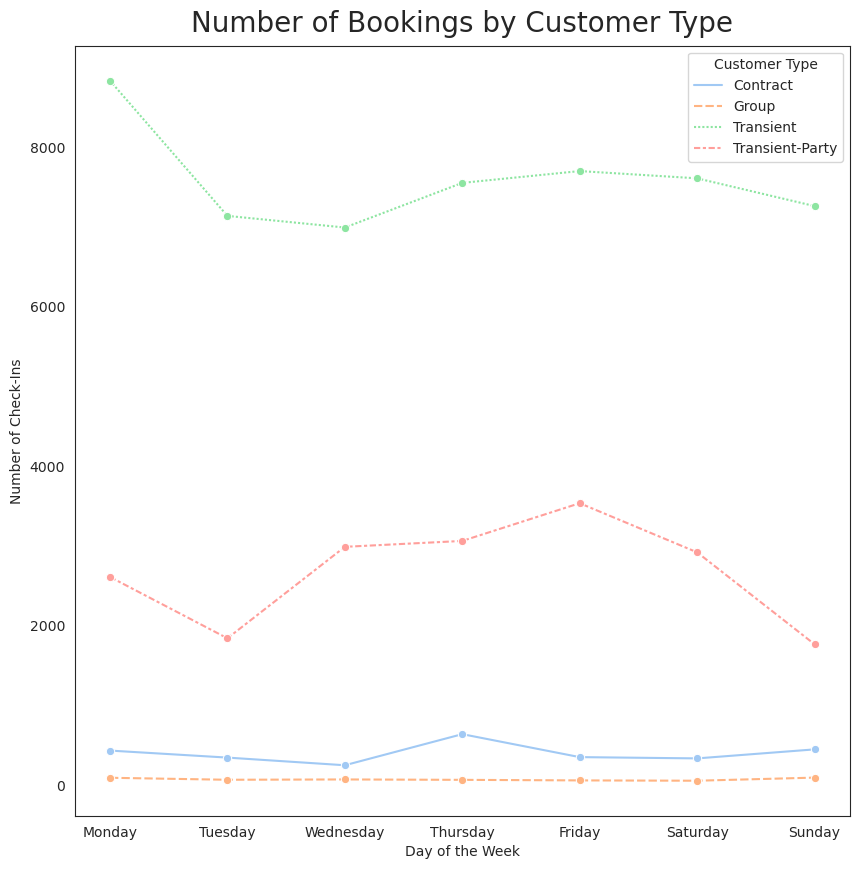

In [51]:
#line chart

fig= plt.figure(figsize= (10, 10))
sns.lineplot(data= customer_per_day, marker= "o")

plt.title("Number of Bookings by Customer Type", fontsize= 20, pad= 10)
plt.legend(title= "Customer Type")
plt.xticks(fontsize= 10)
plt.xlabel("Day of the Week")
plt.yticks(fontsize= 10)
plt.ylabel("Number of Check-Ins")


plt.show()

In [52]:
#Seasons in Europe
# Summer (June – August)
# Autumn (September – November)
# Winter (December – February)
# Spring (March – May)
#source- https://expatexplore.com/blog/europe-by-season-when-to-travel-where/

seasons= {"Spring": ["March", "April", "May"],
         "Summer": ["June", "July", "August"],
         "Winter": ["December", "January", "February"],
         "Autumn": ["September", "October", "November"]}

month_season= dict()
for season, months in seasons.items():
    for month in months:
        month_season[month]= season


seasons_df= (pd
             .DataFrame(month_season, index= [0])
             .T
             .reindex(months_days.months())
             .rename(columns= {0: "season"})
            )
seasons_df

,season
January,Winter
February,Winter
March,Spring
April,Spring
May,Spring
June,Summer
July,Summer
August,Summer
September,Autumn
October,Autumn


In [53]:

avg_guests_per_month= (hotels
                        .assign(total_guests= lambda df_: df_["adults"]+df_["children"]+df_["babies"])
                        .groupby([hotels["arrival_date"].dt.year.rename("year"), hotels["arrival_date"].dt.month_name().rename("month")])
                        .agg(total_guests= ("total_guests", np.sum))
                        .reset_index()
                        .groupby(["month"])
                        .mean()
                        .assign(total_guests= lambda df_: round(df_["total_guests"], 2))
                        [["total_guests"]]
                        .reindex(months_days.months_reordered())
                        .merge(seasons_df, left_index=True, right_index=True)
                        .reset_index()
                        .rename(columns= {"index": "month"})
                   )
avg_guests_per_month

,month,total_guests,season
0,December,4246.00,Winter
1,January,3593.00,Winter
2,February,5014.50,Winter
3,March,6122.50,Spring
4,April,6416.50,Spring
5,May,6721.00,Spring
6,June,6260.00,Summer
7,July,5772.33,Summer
8,August,6379.33,Summer
9,September,6034.00,Autumn


In [54]:
#nightingale rose chart
fig= px.bar_polar(avg_guests_per_month, r="total_guests", theta="month",
                  color="season", 
                  template="simple_white",
#                   template="plotly_dark",
#                    category_orders= {"month":month_order},
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.update_layout(
    title= {"text": "Average Guests Visiting Per Month", #"font": {"color": "#46BA50"}, 
            "x": 0.5},
#     font={"color": "#CCE716"},
    legend_title= {"text":"Season",  "side": "top"})
#                  showlegend= False)
fig.show()